### Algreian Forest Lives Dataset


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv" , header=1)
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
df.drop(['day', 'month' , 'year'] ,axis=1 , inplace =True)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      244 non-null    object
dtypes: object(11)
memory usage: 21.3+ KB



### Data Cleaning


In [6]:
df[df.isnull().any(axis=1)]


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  245 non-null    object 
 1    RH          245 non-null    object 
 2    Ws          245 non-null    object 
 3   Rain         245 non-null    object 
 4   FFMC         245 non-null    object 
 5   DMC          245 non-null    object 
 6   DC           245 non-null    object 
 7   ISI          245 non-null    object 
 8   BUI          245 non-null    object 
 9   FWI          245 non-null    object 
 10  Classes      244 non-null    object 
 11  Region       246 non-null    float64
dtypes: float64(1), object(11)
memory usage: 23.2+ KB


In [9]:
df.isnull().sum()

Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
df["Region"]=df["Region"].astype(int)



In [11]:
df.isnull().sum()


Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [12]:
df = df.dropna().reset_index(drop=True)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df=df.drop(122).reset_index(drop=True)


In [16]:
df.loc[122]

Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [17]:
df.columns


Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
# strip whitespace from column names (fixes names like " RH" or " Ws"), then convert the selected cols
df.columns = df.columns.str.strip()
df[[ 'Temperature', 'RH', 'Ws']] = df[['Temperature', 'RH', 'Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    int64 
 1   RH           243 non-null    int64 
 2   Ws           243 non-null    int64 
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    object
 11  Region       243 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 22.9+ KB


In [20]:
objects=[features for features in df.columns if df[features].dtypes=='object']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)
        

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [23]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
df.to_csv("Cleaned_forest_fires_dataset.csv",index=False)

### Explanatory Dataset Analysis

In [25]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [26]:
df['Classes']= np.where(df['Classes'].str.contains('not fire') ,0,1)

In [27]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


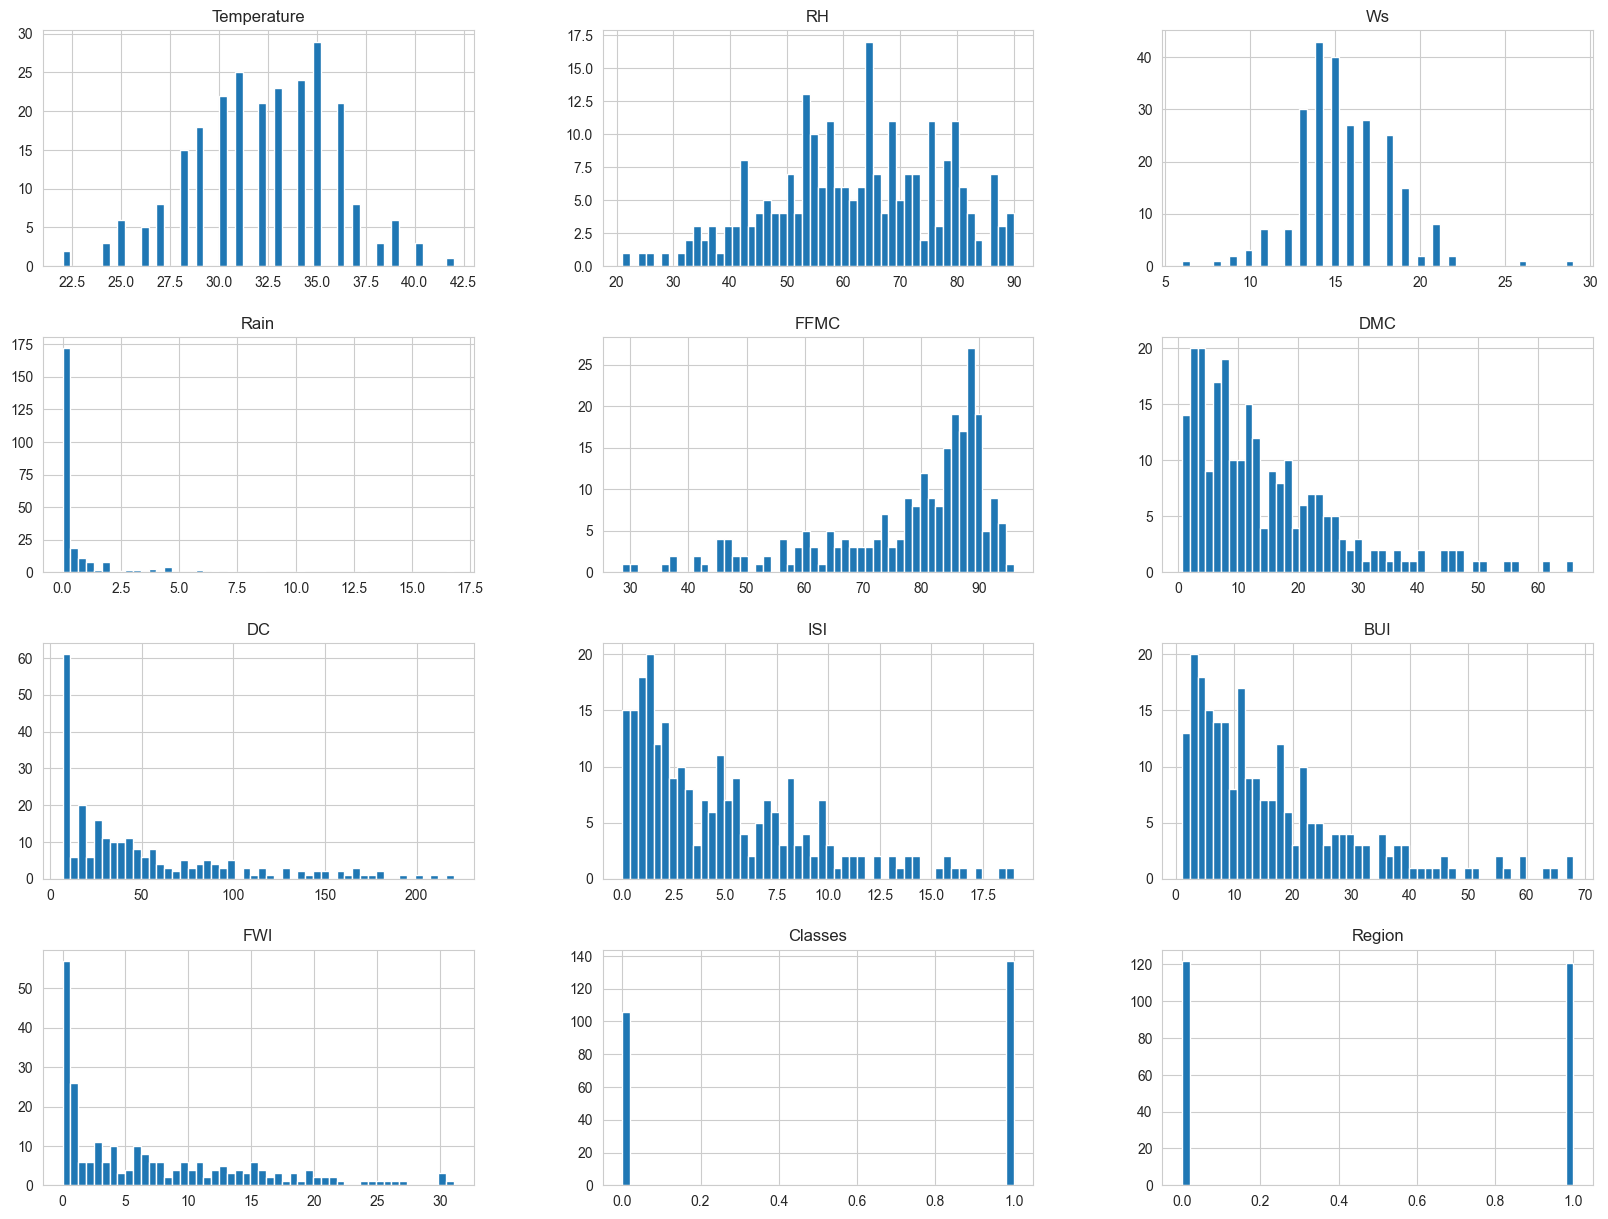

In [29]:
# use seaborn to set the style (seaborn is already imported as sns)
sns.set_style('whitegrid')
df.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

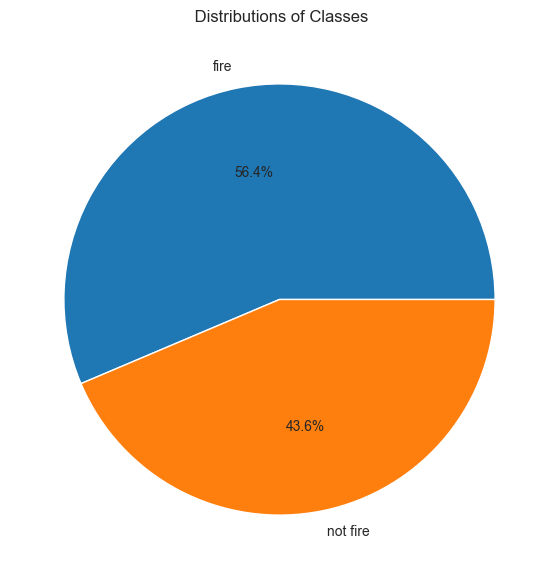

In [31]:
classlabels=['fire', 'not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title(' Distributions of Classes'  )
plt.show()

In [32]:
## independent and dependent features

x = df.drop(['FWI'], axis = 1)
y = df['FWI']
print(x)
print(y)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]
0      0.5
1      0.4
2      0.1
3      0.0
4      

In [33]:
## train_test_split operations
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size= 0.25, random_state=42)



In [34]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [35]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### Correlations

<Axes: >

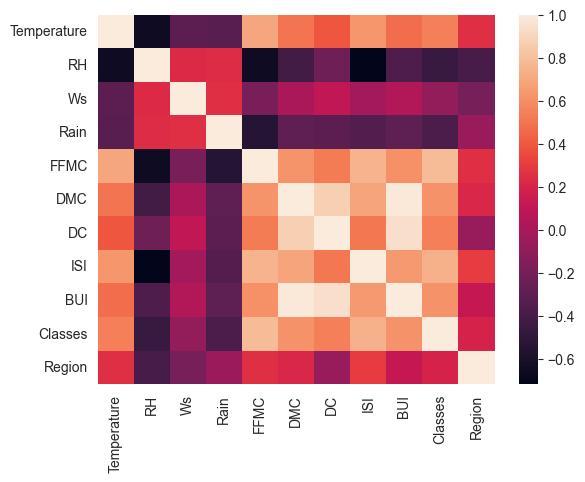

In [36]:
sns.heatmap(x_train.corr())

In [37]:
def correlations(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [38]:
corr_features = correlations(x_train , 0.85)

In [39]:
corr_features

{'BUI', 'DC'}

In [40]:
x_train.drop(['BUI' , 'DC'] , axis = 1, inplace = True)
x_test.drop(['BUI' , 'DC'] , axis = 1, inplace = True)
print( x_train.shape, x_test.shape)

(182, 9) (61, 9)


In [41]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [42]:
print(x_test)

     Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
24            31  64  15   0.0  86.7  14.2  5.7        1       0
6             33  54  13   0.0  88.2   9.9  6.4        1       0
152           28  58  18   2.2  63.7   3.2  1.2        0       1
232           34  58  13   0.2  79.5  18.7  2.1        0       1
238           30  65  14   0.0  85.4  16.0  4.5        1       1
..           ...  ..  ..   ...   ...   ...  ...      ...     ...
162           34  56  15   2.9  74.8   7.1  1.6        0       1
178           33  57  16   0.0  87.5  15.7  6.7        1       1
224           31  72  14   0.0  84.2   8.3  3.8        1       1
230           36  33  13   0.1  90.6  25.8  9.0        1       1
154           34  56  17   0.1  84.7   9.7  4.7        1       1

[61 rows x 9 columns]


In [43]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)



In [44]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [45]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

#### Box Plots to Understand Effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

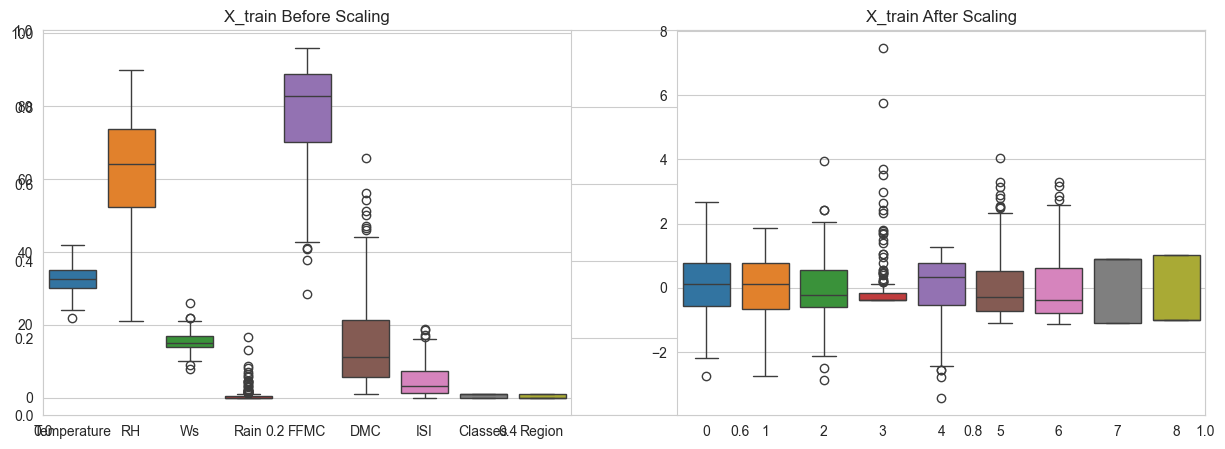

In [46]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('X_train After Scaling')


#### Linear Regression Model


Mean absolute Error 0.5468236465249978
R2_score 0.9847657384266951


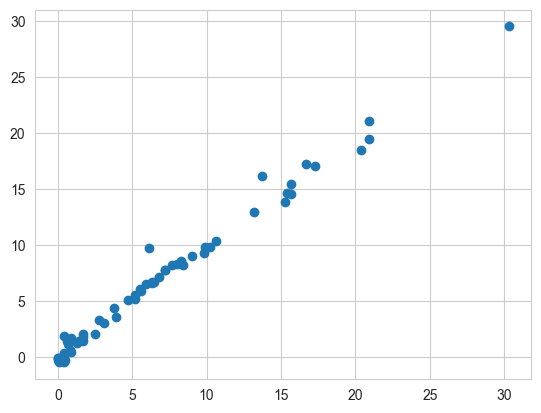

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




#### Lasso Regression 

Mean absolute Error 1.133175994914409
R2_score 0.9492020263112388


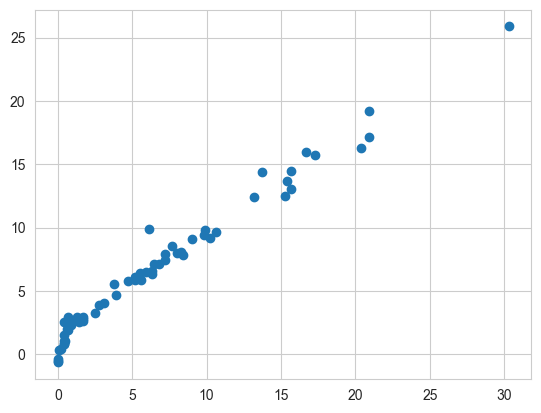

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lassoreg = Lasso()
lassoreg.fit(x_train_scaled, y_train)
y_pred = lassoreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




### Cross Validation Lasso

In [49]:
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv =5)
lassocv.fit(x_train_scaled , y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [50]:
lassocv.alpha_


np.float64(0.05725391318234408)

In [51]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [52]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

#### Ridge Regression Model

Mean absolute Error 0.5642305340105715
R2_score 0.9842993364555512


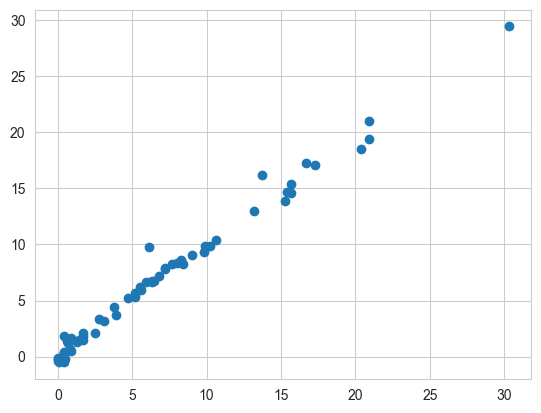

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
Ridgereg = Ridge()
Ridgereg.fit(x_train_scaled, y_train)
y_pred = Ridgereg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




#### RidgeCV Regression Model


Mean absolute Error 0.5642305340105715
R2_score 0.9842993364555512


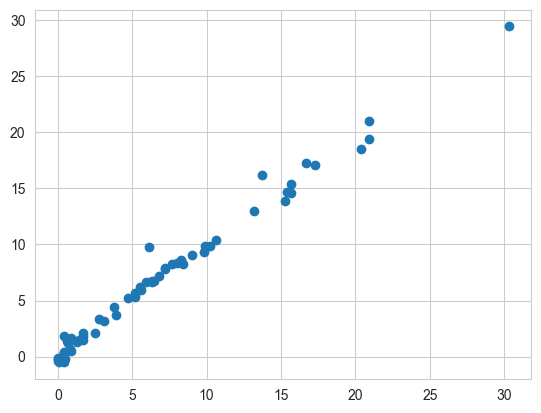

In [58]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
RidgeregCV = RidgeCV(cv=5)
RidgeregCV.fit(x_train_scaled, y_train)
y_pred = RidgeregCV.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




In [60]:
RidgeregCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

#### ElasticNet Model

Mean absolute Error 1.8822353634896005
R2_score 0.8753460589519703


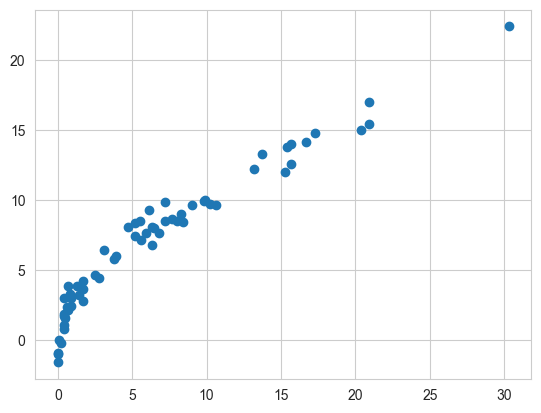

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticreg =ElasticNet()
elasticreg.fit(x_train_scaled, y_train)
y_pred = elasticreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




#### ElasticNetCV Model

In [66]:
elasticreg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Mean absolute Error 0.6575946731430898
R2_score 0.9814217587854941


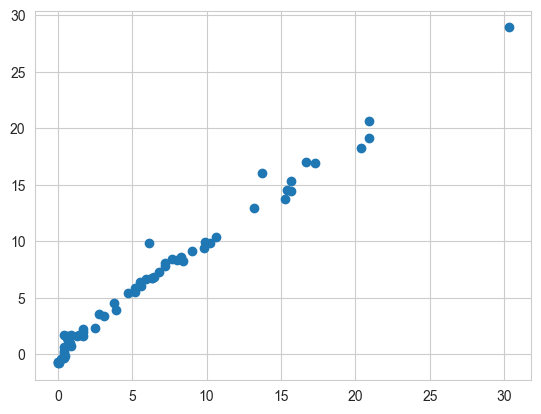

In [64]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled, y_train)
y_pred = elasticcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute Error", mae)
print("R2_score" , score)
plt.scatter(y_test , y_pred)




In [65]:
elasticcv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### PICKLING

In [68]:
### Pickling the machine learning model , prepocessing model standardscar
scalar


,copy,True
,with_mean,True
,with_std,True


In [71]:
Ridgereg

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
import pickle
pickle.dump(scalar, open('scalar.pkl', 'wb'))
pickle.dump(Ridgereg, open('Ridgereg.pkl' , 'wb'))


: 